# Employee Performance Analysis

## PROJECT GOAL:

## 1. Department wise performances

## 2. Top 3 Important Factors effecting employee performance

## 3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees

## 4. Recommendations to improve the employee performance based on insights from analysis.

## Load libraries and dataset

In [1]:
# Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import pylab

# Machine Learning Libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, classification_report, f1_score, recall_score, confusion_matrix
)


## Dataset

In [2]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
pd.set_option('display.max_columns',None) # Used to display the all features

In [3]:
# Creating a DataFrame
df = pd.DataFrame(data)

# Exploratory Data Analysis

## Basic dataset insights

In [4]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [5]:
print("The shape of the dataframe is: {:,} columns and {:,} rows".format(df.shape[1], df.shape[0]))

The shape of the dataframe is: 28 columns and 1,200 rows


In [6]:
df.dtypes.value_counts()

int64     19
object     9
Name: count, dtype: int64

In [7]:
# Checking NULL
null_count = sum(df.isnull().any())

print("There are {} NULL values in the dataframe".format(null_count))

There are 0 NULL values in the dataframe


In [8]:
# Check basic statistics, although difficult to go into detail with so many columns
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [9]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

### CONVERT CATEGORICAL TO NUMERICAL

In [11]:
# Get all categorical feature list
list(df.select_dtypes('object'))

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

**Technique Used:**

**1.Mannual Encoding:** Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

**2.Frequency Encoding:** Frequency encoding is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts.

### 1.Gender: 

In [12]:
# Get value counts of gender
df.Gender.value_counts()

Gender
Male      725
Female    475
Name: count, dtype: int64

In [13]:
# Use mannual encoding to map the labels
df.Gender = df.Gender.map({'Male':1,'Female':0})

*Map male with 1 and female with 0*

### 2.Education Background

In [14]:
# Get value counts of Education Background
df.EducationBackground.value_counts()

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [15]:
# Use frequency encoding
df.loc[df['EducationBackground'] == 'Life Sciences', 'EducationBackground'] = 5
df.loc[df['EducationBackground'] == 'Medical', 'EducationBackground'] = 4
df.loc[df['EducationBackground'] == 'Marketing', 'EducationBackground'] = 3
df.loc[df['EducationBackground'] == 'Technical Degree', 'EducationBackground'] = 2
df.loc[df['EducationBackground'] == 'Other', 'EducationBackground'] = 1
df.loc[df['EducationBackground'] == 'Human Resources', 'EducationBackground'] = 0

In [16]:
# Checking conversion happen or not
df.EducationBackground.value_counts()

EducationBackground
5    492
4    384
3    137
2    100
1     66
0     21
Name: count, dtype: int64

### 3.Marital Status

In [17]:
# Get the value counts of marital status
df.MaritalStatus.value_counts()

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

In [18]:
# Use mannual encoding
df.MaritalStatus = df.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [19]:
# Check conversion happen or not
df.MaritalStatus.value_counts()

MaritalStatus
2    548
1    384
0    268
Name: count, dtype: int64

### 4.Employee Department

In [20]:
# Get the value counts of employee department 
df.EmpDepartment.value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [21]:
# Use frequency encoding
df.loc[df['EmpDepartment'] == 'Sales', 'EmpDepartment'] = 5
df.loc[df['EmpDepartment'] == 'Development', 'EmpDepartment'] = 4
df.loc[df['EmpDepartment'] == 'Research & Development', 'EmpDepartment'] = 3
df.loc[df['EmpDepartment'] == 'Human Resources', 'EmpDepartment'] = 2
df.loc[df['EmpDepartment'] == 'Finance', 'EmpDepartment'] = 1
df.loc[df['EmpDepartment'] == 'Data Science', 'EmpDepartment'] = 0

In [22]:
# Check conversion happen or not
df.EmpDepartment.value_counts()

EmpDepartment
5    373
4    361
3    343
2     54
1     49
0     20
Name: count, dtype: int64

### 5.Employee Job Role

In [23]:
# Getting the value counts of EmpJobRole
df.EmpJobRole.value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [24]:
# Use frequency encoding because feature contain a lots of label
df.loc[df['EmpJobRole'] == 'Sales Executive', 'EmpJobRole'] = 18
df.loc[df['EmpJobRole'] == 'Developer', 'EmpJobRole'] = 17
df.loc[df['EmpJobRole'] == 'Manager R&D', 'EmpJobRole'] = 16
df.loc[df['EmpJobRole'] == 'Research Scientist', 'EmpJobRole'] = 15
df.loc[df['EmpJobRole'] == 'Sales Representative', 'EmpJobRole'] = 14
df.loc[df['EmpJobRole'] == 'Laboratory Technician', 'EmpJobRole'] = 13
df.loc[df['EmpJobRole'] == 'Senior Developer', 'EmpJobRole'] = 12
df.loc[df['EmpJobRole'] == 'Manager', 'EmpJobRole'] = 11
df.loc[df['EmpJobRole'] == 'Finance Manager', 'EmpJobRole'] = 10
df.loc[df['EmpJobRole'] == 'Human Resources', 'EmpJobRole'] = 9
df.loc[df['EmpJobRole'] == 'Technical Lead', 'EmpJobRole'] = 8
df.loc[df['EmpJobRole'] == 'Manufacturing Director', 'EmpJobRole'] = 7
df.loc[df['EmpJobRole'] == 'Healthcare Representative', 'EmpJobRole'] = 6
df.loc[df['EmpJobRole'] == 'Data Scientist', 'EmpJobRole'] = 5
df.loc[df['EmpJobRole'] == 'Research Director', 'EmpJobRole'] = 4
df.loc[df['EmpJobRole'] == 'Business Analyst', 'EmpJobRole'] = 3
df.loc[df['EmpJobRole'] == 'Senior Manager R&D', 'EmpJobRole'] = 2
df.loc[df['EmpJobRole'] == 'Delivery Manager', 'EmpJobRole'] = 1
df.loc[df['EmpJobRole'] == 'Technical Architect', 'EmpJobRole'] = 0

In [25]:
# Check conversion happen or not
df.EmpJobRole.value_counts()

EmpJobRole
18    270
17    236
16     94
15     77
14     69
13     64
12     52
11     51
10     49
9      45
8      38
7      33
6      33
5      20
4      19
3      16
2      15
1      12
0       7
Name: count, dtype: int64

### 6.Business Travel Frequency:

In [26]:
# Get the value count of buisness travel frequency
df.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

In [27]:
# Use mannual encoding Because feature contain minimum label
df.BusinessTravelFrequency = df.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [28]:
# Check conversion happen or not
df.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
2    846
1    222
0    132
Name: count, dtype: int64

### 7.Overtime:

In [29]:
# Get the value count of Overtime
df.OverTime.value_counts()

OverTime
No     847
Yes    353
Name: count, dtype: int64

In [30]:
# Use mannual Encoding
df.OverTime = df.OverTime.map({'No':1,'Yes':0})

In [31]:
# Check conversion happen or not
df.OverTime.value_counts()

OverTime
1    847
0    353
Name: count, dtype: int64

### 8.Attrition

In [32]:
# Get the value counts of Attrition
df.Attrition.value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

In [33]:
# Use Mannual encoding because feature contain less no of label
df.Attrition = df.Attrition.map({'No':1,'Yes':0})

In [34]:
# Check conversion happen or not
df.Attrition.value_counts()

Attrition
1    1022
0     178
Name: count, dtype: int64

In [35]:
# Check all data features 
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,3,1,5,18,2,10,3,4,55,3,2,4,1,1,12,4,10,2,2,10,7,0,8,1,3
1,E1001006,47,1,3,1,5,18,2,14,4,4,42,3,2,1,2,1,12,4,20,2,3,7,7,1,7,1,3
2,E1001007,40,1,5,2,5,18,1,5,4,4,48,2,3,1,5,0,21,3,20,2,3,18,13,1,12,1,4
3,E1001009,41,1,0,0,2,11,2,10,4,2,73,2,5,4,3,1,15,2,23,2,2,21,6,12,6,1,3
4,E1001010,60,1,3,1,5,18,2,16,4,1,84,3,2,1,8,1,14,4,10,1,3,2,2,2,2,1,3


### CHECK OUTLIERS AND IMPUTE OUTLIERS:

**BoxPlot:** Box plots are used to show distributions of numeric data values as well as it helps to detect the outliers.

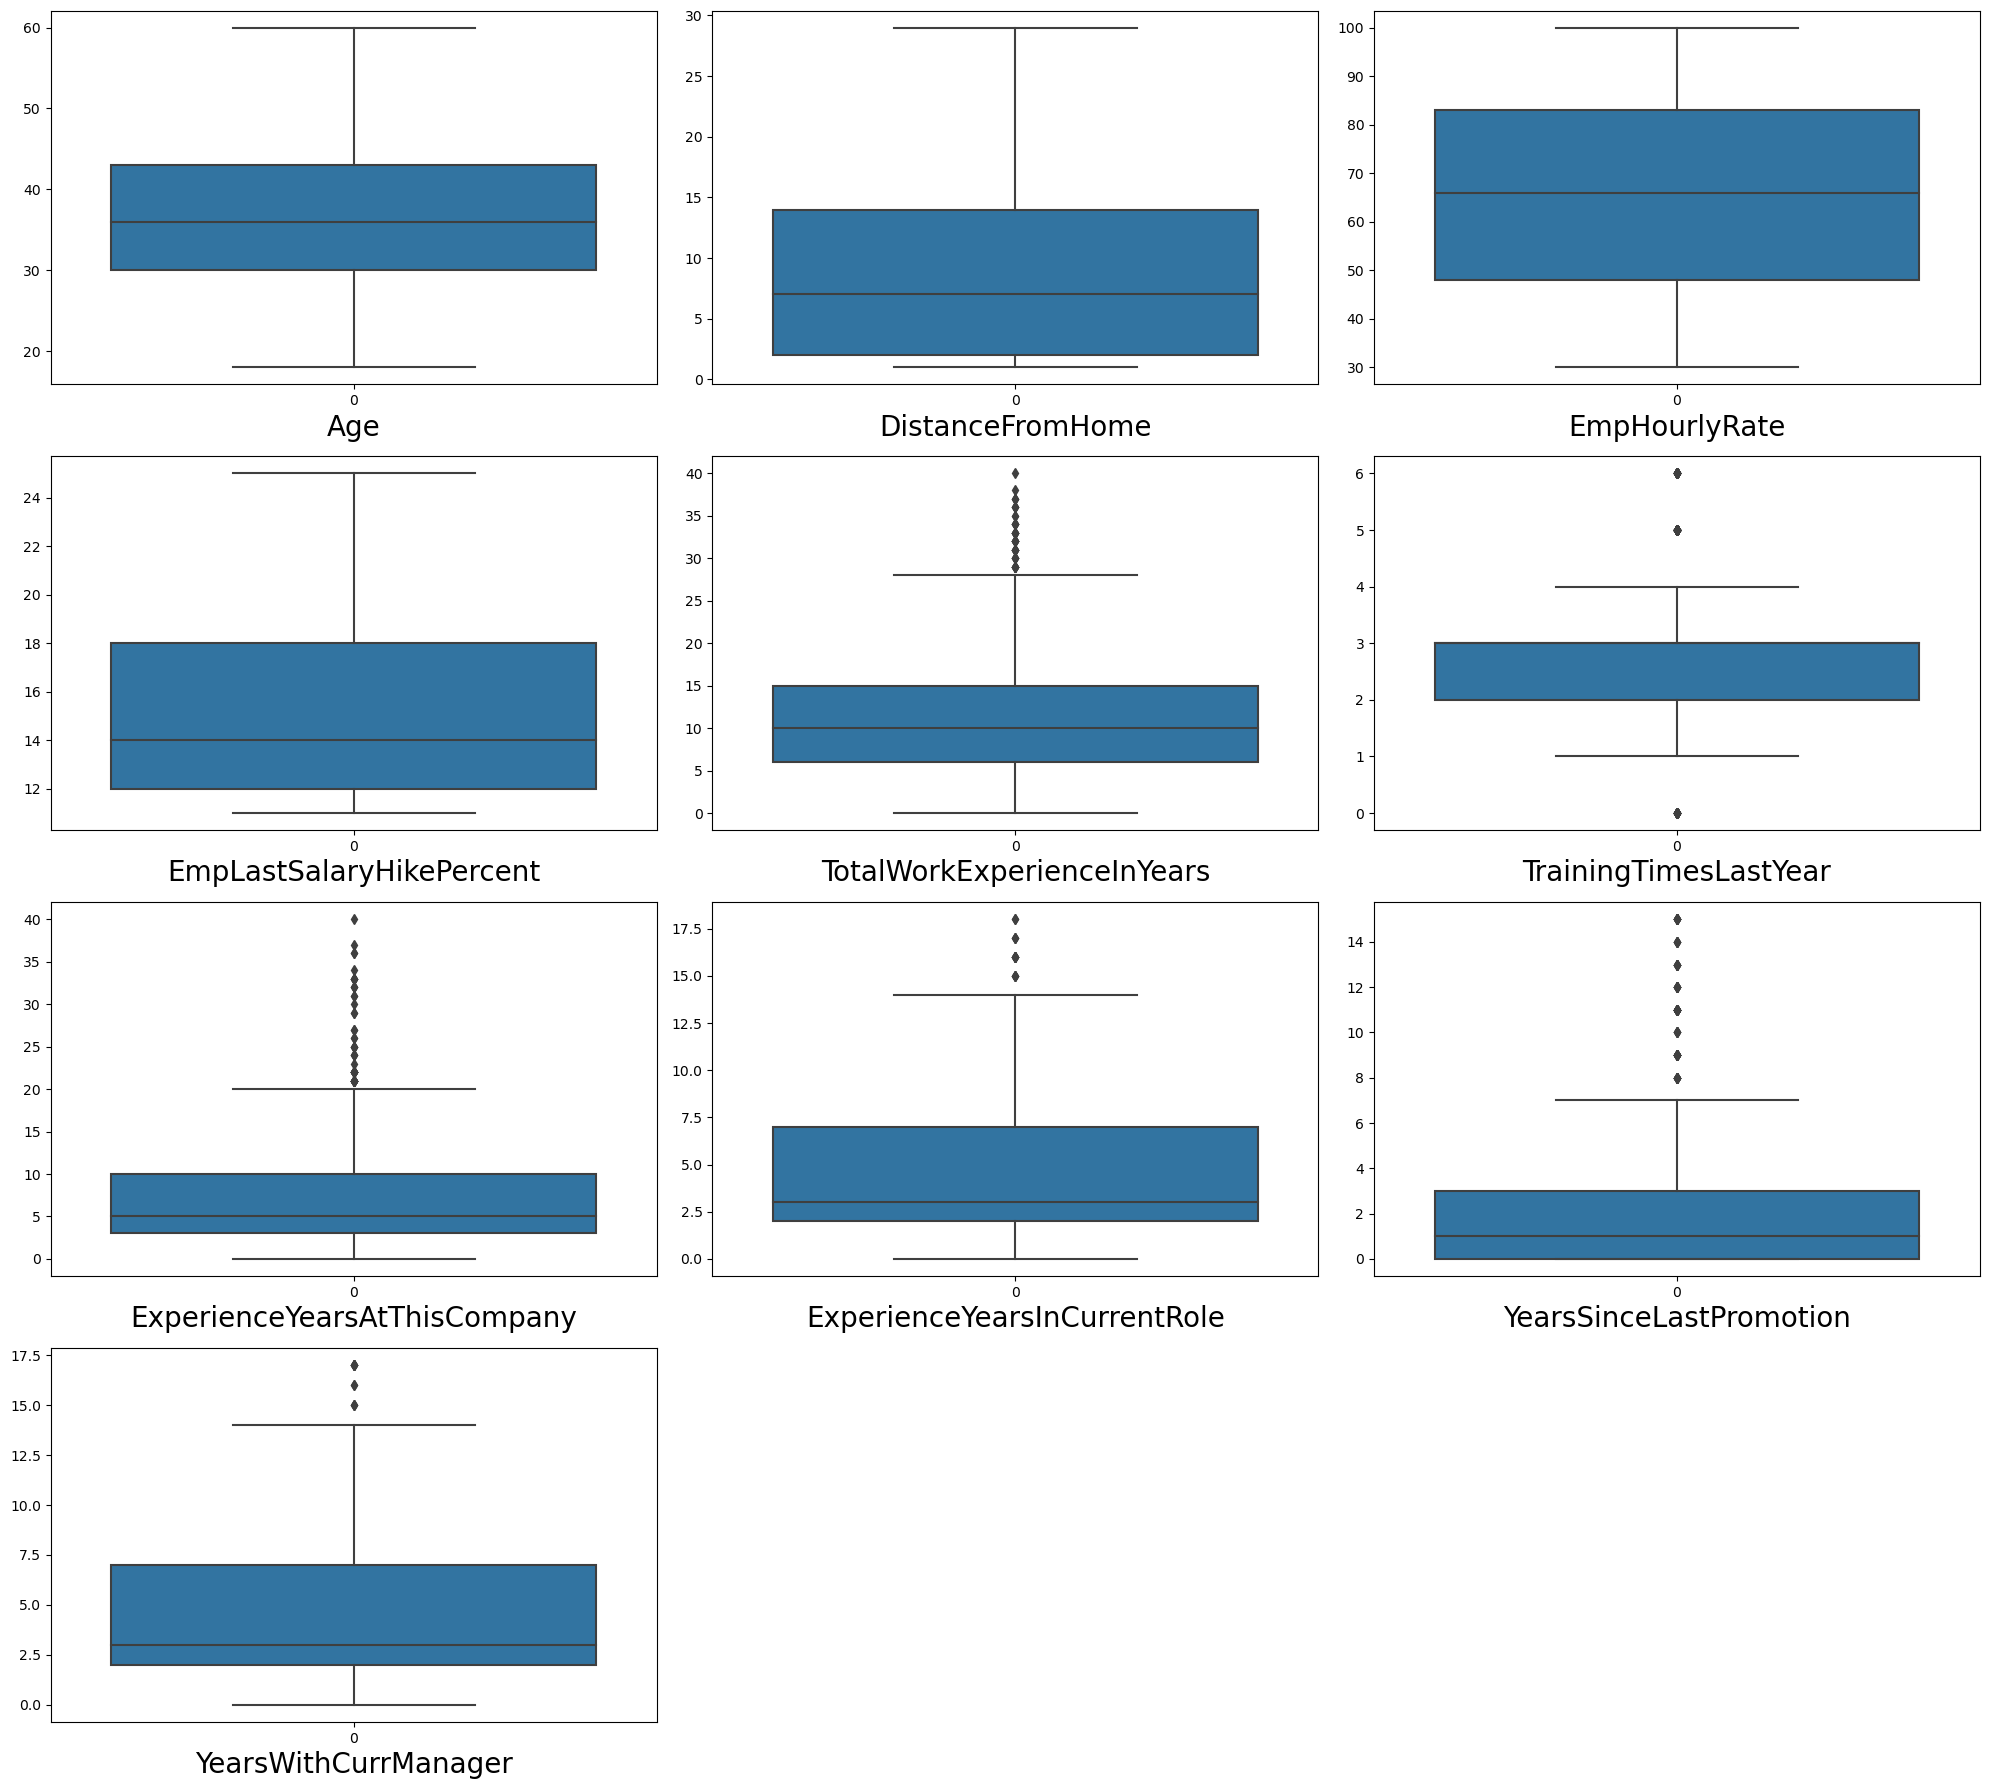

In [36]:
out = df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


*Here we are use inter quatile range to impute the outlier, becuase data is not normally distributed*.

**IQR:**
*IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles*.

### 1.Total Work Experiance in year

In [37]:
# Use iqr range because some skewed in data
iqr = stats.iqr(df['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = df['TotalWorkExperienceInYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [38]:
# Impute outlier
df.loc[df['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=df['TotalWorkExperienceInYears'].median()

In [39]:
# filtering data after imputation
df.loc[df['TotalWorkExperienceInYears'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### 2.Training Times Last Year

In [40]:
# Use iqr range because some skewed in data
iqr = stats.iqr(df['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['TrainingTimesLastYear'].quantile(0.25)
Q3 = df['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [41]:
# Impute outlier in max & minmum limit
df.loc[df['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()
df.loc[df['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()

In [42]:
# Filtering the min limit
df.loc[df['TrainingTimesLastYear'] < min_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [43]:
# Filtering the max limit
df.loc[df['TrainingTimesLastYear'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### 3.Experience Years At This Company

In [44]:
# Use iqr range because some skewed in data
iqr = stats.iqr(df['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = df['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [45]:
# Impute outlier
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=df['ExperienceYearsAtThisCompany'].median()

In [46]:
# Filtering the data
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### 4.Experience Years In Current Role

In [47]:
# Use iqr range because some skewed in data
iqr = stats.iqr(df['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = df['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [48]:
# Impute the outlier
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = df['ExperienceYearsInCurrentRole'].median()

In [49]:
# Filtering the data
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### 5.Years Since Last Promotion

In [50]:
# use iqr because some skewed in data
iqr = stats.iqr(df['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = df['YearsSinceLastPromotion'].quantile(0.25)
Q3 = df['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [51]:
# impute outlier
df.loc[df['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=df['YearsSinceLastPromotion'].median()

In [52]:
# Filtering data
df.loc[df['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### 6.Years With Current Manager

In [53]:
# use iqr because some skewed in data
iqr = stats.iqr(df['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = df['YearsWithCurrManager'].quantile(0.25)
Q3 = df['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [54]:
# impute outlier
df.loc[df['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()

In [55]:
# Filtering the data
df.loc[df['YearsWithCurrManager'] >max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### CHECKING OUTLIER AFTER IMPUTATION

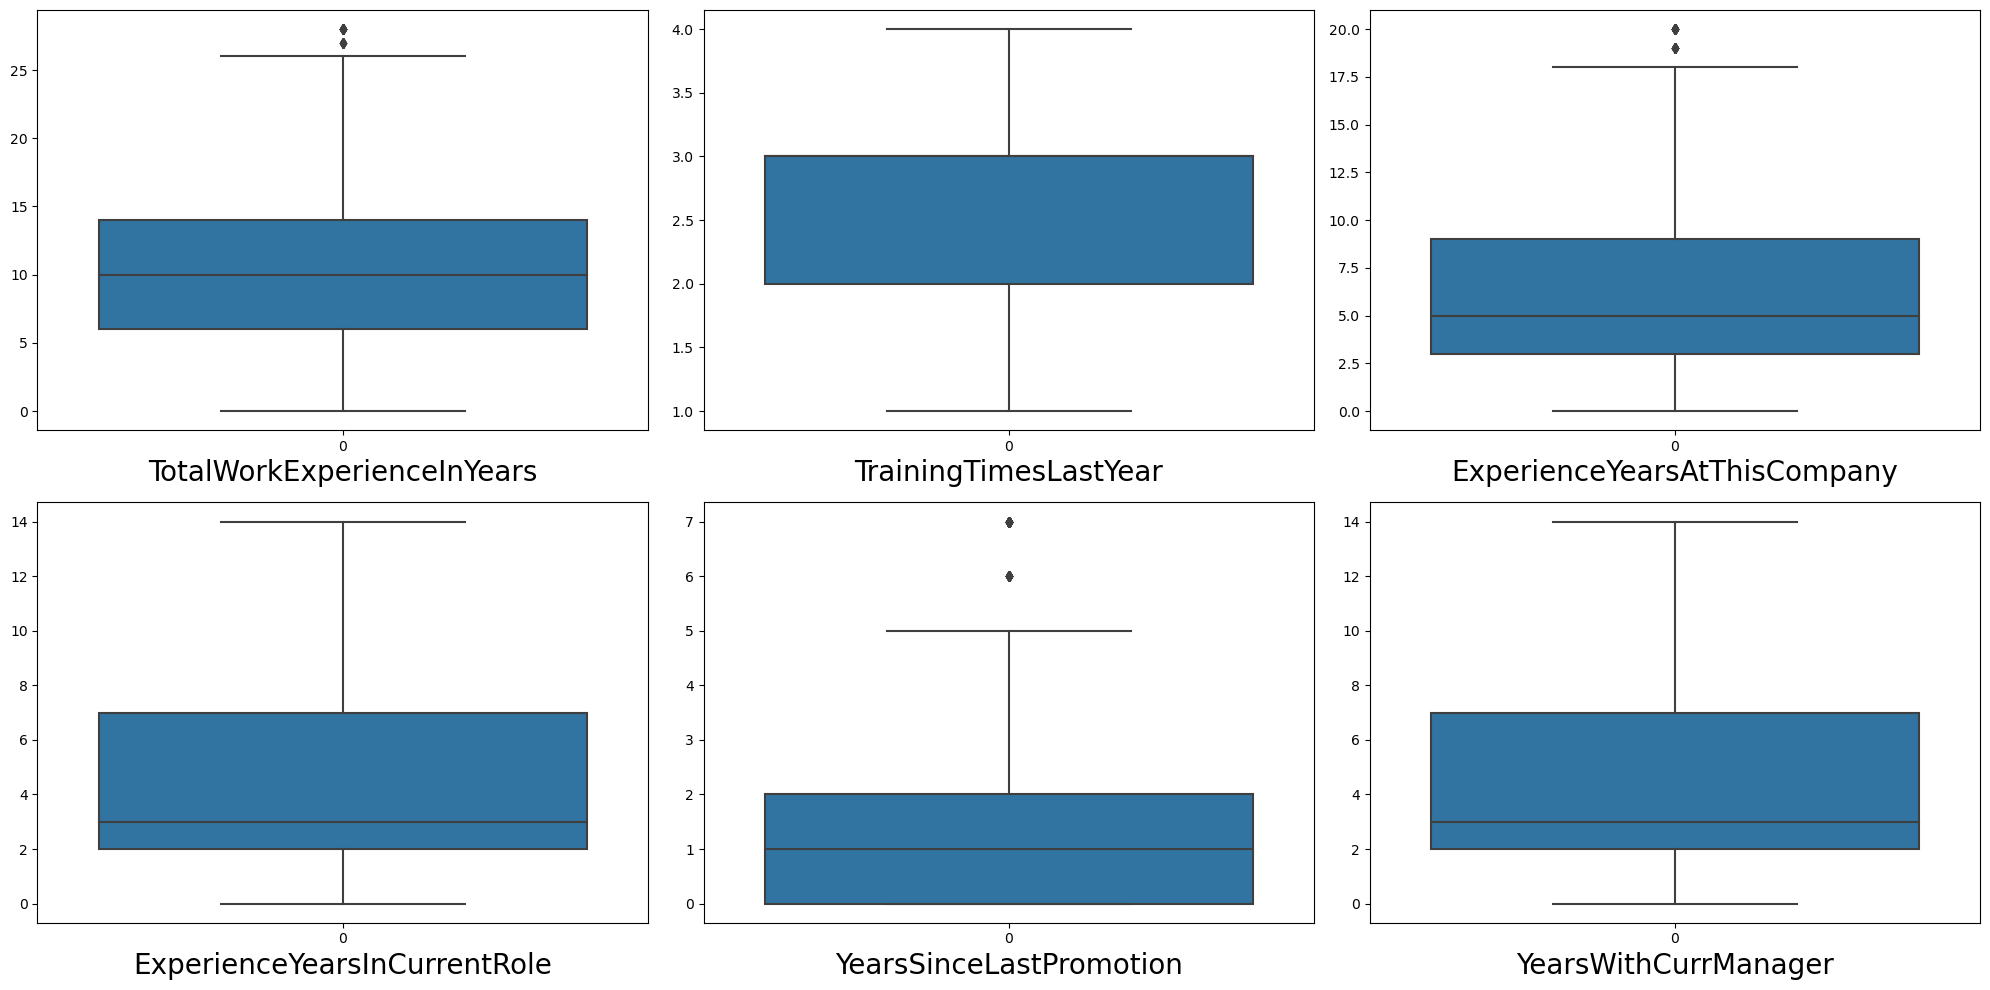

In [56]:
out = df[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(2,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


**Observation:**
*Outlier impute sucessfully, but some feature box plot showing outlier, so we can not impute this outlier*.

### FEATURE TRANSFORMATION

*From the last EDA file we get the yearsince last promotion feature have some skewed in data, so we are going to use square root transformation*.

**Q-Q Plot:**  *Q–Q plot is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other*.

In [57]:
# define a function to plot a Q-Q plot
def plot_df(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

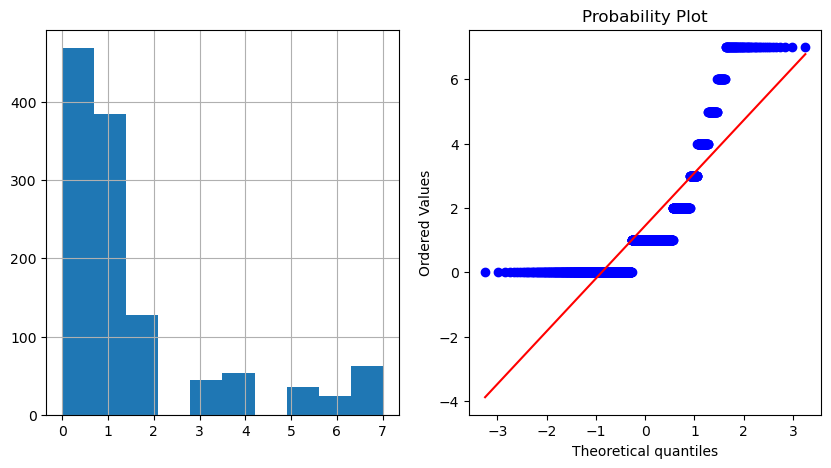

In [58]:
plot_df(df,'YearsSinceLastPromotion')

### SCALING THE DATA

**Standard Scaling:**
*Standardization is the process of scaling the feature, it assumes the feature follow  normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1*.

In [59]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'YearsSinceLastPromotion']]=scalar.fit_transform(data[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','YearsSinceLastPromotion']])

In [60]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,-0.541458,1,3,1,5,18,2,0.102061,3,4,-0.543569,3,2,4,1,1,-0.889111,4,-0.058535,-0.879579,2,0.868276,0.864098,-0.756553,1.202103,1,3
1,E1001006,1.109888,1,3,1,5,18,2,0.591464,4,4,-1.187042,3,2,1,2,1,-0.889111,4,1.512870,-0.879579,3,0.200371,0.864098,-0.234492,0.902825,1,3
2,E1001007,0.339260,1,5,2,5,18,1,-0.509693,4,4,-0.890055,2,3,1,5,0,1.594054,3,1.512870,-0.879579,3,2.649355,2.661702,-0.234492,2.399219,1,4
3,E1001009,0.449349,1,0,0,2,11,2,0.102061,4,2,0.347393,2,5,4,3,1,-0.061389,2,1.984292,-0.879579,2,-0.244898,0.564498,-0.234492,0.603546,1,3
4,E1001010,2.541054,1,3,1,5,18,2,0.836165,4,1,0.891870,3,2,1,8,1,-0.337297,4,-0.058535,-2.303999,3,-0.912803,-0.633905,0.287569,-0.593570,1,3


### FEATURE SELECTION

### DROP UNIQUE AND CONTANT FEATURES

In [61]:
# Dropping employee number because this is a constant column as well as drop Years Since Last Promotion because we create a new feaure using square root tr
df.drop(['EmpNumber','YearsSinceLastPromotion'],axis=1,inplace=True)

### CHECKING CORELATION
**Heatmap:** *A heatmap is a graphical representation of data that uses a system of color-coding to represent different values*.

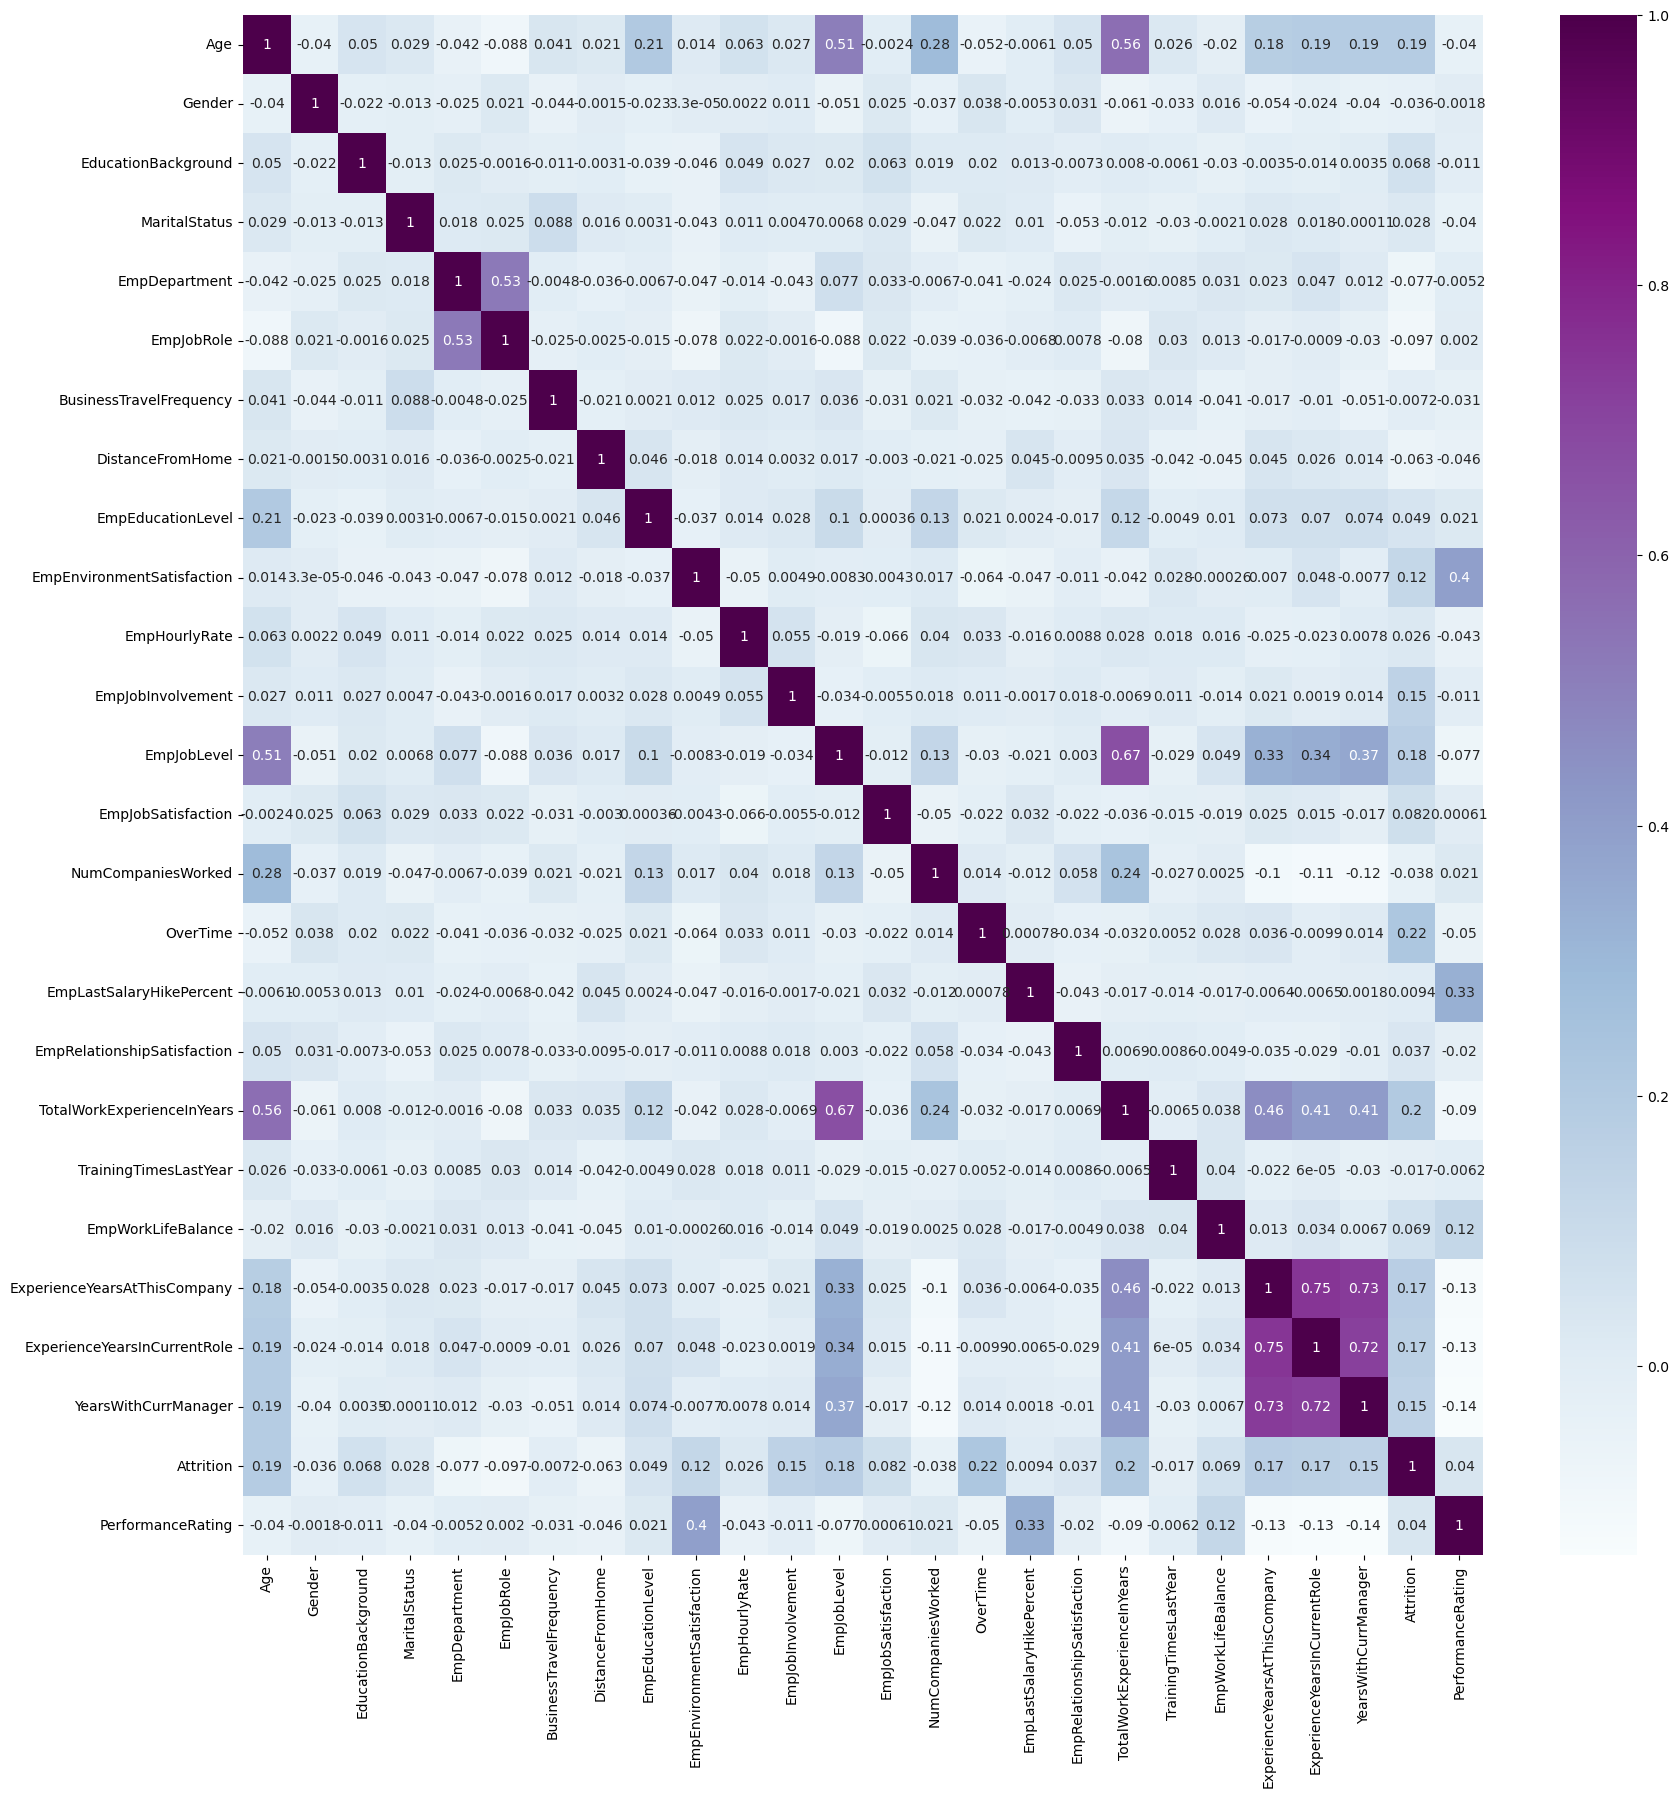

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')
plt.show()

*From above heatmap scale we are clearly seen the their is no highly correlated feature in data*.
*But we confirm with the help of simple code*.

In [63]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


*Now we confirm their is no highly correlated feature is present*.

## Analysis of Performance Ratings by Department

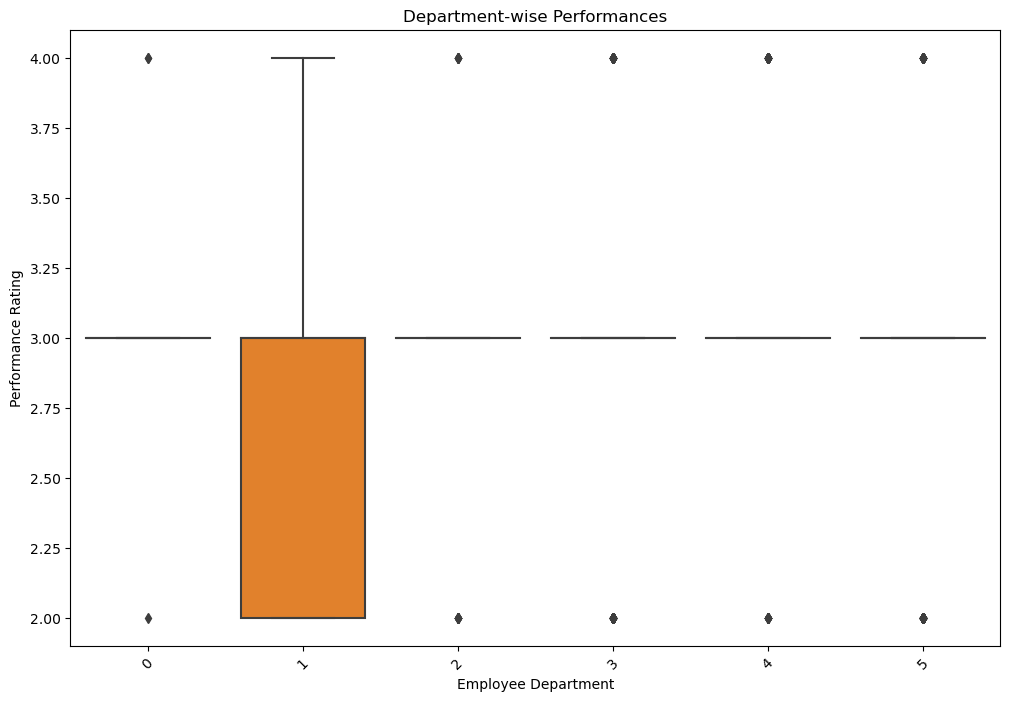

In [64]:
# Visualization 1: Department-wise Performances
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='EmpDepartment', y='PerformanceRating')
plt.title('Department-wise Performances')
plt.xlabel('Employee Department')
plt.ylabel('Performance Rating')
plt.xticks(rotation=45)
plt.show()

### CHECKING DUPLICATES

In [65]:
df.duplicated().sum()

0

*Their is no Duplicates is present in data*.

### PRINCIPLE COMPONENT ANALYSIS

*Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset*.

**Used For:** *The dataset contain more than 25 feature, removes the noise in the data and keeps only the most important features in the dataset. That will mitigate the overfitting of the data and increase the model's performance*.

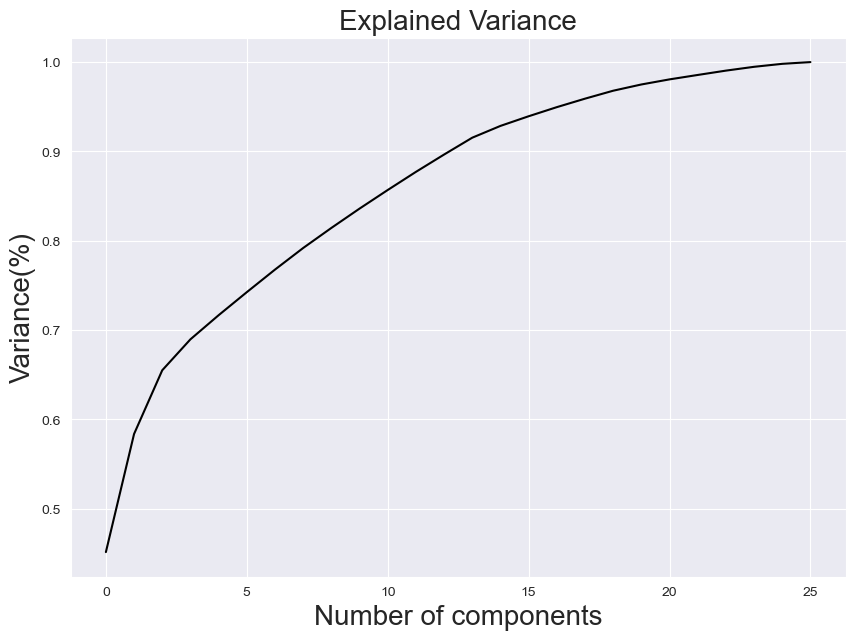

In [66]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(df)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

**Observation:** *Data is contain total 27 feature after dropping unique and constant column,from above PCA it shows the 25 feature has less varaince loss, so we are going to select 25 feature*.

In [67]:
# Selecting the components
pca = PCA(n_components=25)
new_df = pca.fit_transform(df)
new_df

array([[-4.47461716e+00, -1.63560593e+00,  1.35987621e+00, ...,
         3.10695715e-01, -2.73622936e-01, -1.62067879e-01],
       [-4.35738815e+00, -5.78705541e-02,  2.03984914e+00, ...,
        -1.75001965e-01, -6.84618293e-01, -2.95399760e-04],
       [-4.24499121e+00,  2.58127897e+00,  4.42478564e+00, ...,
        -2.47450319e-01,  7.45476759e-01, -3.71271973e-01],
       ...,
       [ 1.63617185e+00, -1.70581162e+00,  2.93429334e+00, ...,
         3.82850443e-01,  1.12063899e+00, -1.59847038e-02],
       [ 9.09432080e+00, -2.06377521e+00,  9.51413543e-01, ...,
        -1.06420004e-01, -3.93245664e-01,  1.57389654e-01],
       [-4.36719775e+00,  5.98465271e+00, -2.44147010e+00, ...,
        -1.08101073e-01, -1.21159952e-01,  5.08514388e-01]])

### CREATE NEW DATAFRAME

In [68]:
principle_df = pd.DataFrame(data=new_df,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25'])

# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['PerformanceRating']=data.PerformanceRating

principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.474617,-1.635606,1.359876,0.965490,-1.550080,0.179717,0.843739,-1.594458,0.749029,-0.020451,-1.286037,-0.058260,0.407345,-0.249001,-0.004244,0.707790,0.106931,-0.601961,0.097510,0.039537,-0.287547,-0.451346,0.310696,-0.273623,-0.162068,3
1,-4.357388,-0.057871,2.039849,1.537299,0.291088,1.628643,0.763073,0.155870,1.045583,0.797368,-1.703516,1.157972,-0.339029,0.286234,-0.145409,0.500531,-0.358400,0.423352,-0.879996,-0.539284,-0.275408,-0.922157,-0.175002,-0.684618,-0.000295,3
2,-4.244991,2.581279,4.424786,-0.162870,-1.914806,1.102650,-1.479360,0.442567,0.838079,1.505285,0.185119,2.371751,0.827040,0.131010,-0.736234,-0.795708,0.507253,0.461541,0.188903,-0.380440,0.173953,-0.417505,-0.247450,0.745477,-0.371272,4
3,3.012637,0.735434,2.433771,3.347248,1.326405,-2.357479,1.226972,0.340809,-0.223106,-0.053884,-0.142110,-1.405722,0.581401,1.134294,1.758583,-0.218867,0.891003,-1.504801,0.590889,0.202439,0.223840,-0.577573,-0.024454,-0.471628,-0.471033,3
4,-4.249783,5.975149,-0.464801,0.783218,2.877106,0.052133,-0.434443,-0.391564,0.845524,1.203842,-1.614499,0.128538,1.115261,-0.095232,-0.130931,0.812941,-0.300831,1.104789,-1.216270,0.843609,0.101158,-0.177141,0.471097,-0.151107,-0.447970,3


### SAVE PRE-PROCESS DATA

In [69]:
principle_df.to_csv('employee_performance_preprocessed_data.csv')

# Reading new preprocess csv file
df = pd.read_csv('employee_performance_preprocessed_data.csv')

# Get first five rows 
df.head()

,Unnamed: 0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,0,-4.474617,-1.635606,1.359876,0.965490,-1.550080,0.179717,0.843739,-1.594458,0.749029,-0.020451,-1.286037,-0.058260,0.407345,-0.249001,-0.004244,0.707790,0.106931,-0.601961,0.097510,0.039537,-0.287547,-0.451346,0.310696,-0.273623,-0.162068,3
1,1,-4.357388,-0.057871,2.039849,1.537299,0.291088,1.628643,0.763073,0.155870,1.045583,0.797368,-1.703516,1.157972,-0.339029,0.286234,-0.145409,0.500531,-0.358400,0.423352,-0.879996,-0.539284,-0.275408,-0.922157,-0.175002,-0.684618,-0.000295,3
2,2,-4.244991,2.581279,4.424786,-0.162870,-1.914806,1.102650,-1.479360,0.442567,0.838079,1.505285,0.185119,2.371751,0.827040,0.131010,-0.736234,-0.795708,0.507253,0.461541,0.188903,-0.380440,0.173953,-0.417505,-0.247450,0.745477,-0.371272,4
3,3,3.012637,0.735434,2.433771,3.347248,1.326405,-2.357479,1.226972,0.340809,-0.223106,-0.053884,-0.142110,-1.405722,0.581401,1.134294,1.758583,-0.218867,0.891003,-1.504801,0.590889,0.202439,0.223840,-0.577573,-0.024454,-0.471628,-0.471033,3
4,4,-4.249783,5.975149,-0.464801,0.783218,2.877106,0.052133,-0.434443,-0.391564,0.845524,1.203842,-1.614499,0.128538,1.115261,-0.095232,-0.130931,0.812941,-0.300831,1.104789,-1.216270,0.843609,0.101158,-0.177141,0.471097,-0.151107,-0.447970,3


### MODEL CREATION & EVALUATION SUMMARY:

*Loading pre-process data
*Define dependant & independant features
*Balancing the target feature
*Split training and testing data
*Model creation, prediction & evaluation
*Model saving

### LOADING PREPROCESS DATA

In [70]:
df = pd.read_csv('employee_performance_preprocessed_data.csv')
pd.set_option('display.max_columns',None) # Used to display the all features
df.drop('Unnamed: 0',axis=1,inplace=True) # Drop unwanted feature
df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.474617,-1.635606,1.359876,0.965490,-1.550080,0.179717,0.843739,-1.594458,0.749029,-0.020451,-1.286037,-0.058260,0.407345,-0.249001,-0.004244,0.707790,0.106931,-0.601961,0.097510,0.039537,-0.287547,-0.451346,0.310696,-0.273623,-0.162068,3
1,-4.357388,-0.057871,2.039849,1.537299,0.291088,1.628643,0.763073,0.155870,1.045583,0.797368,-1.703516,1.157972,-0.339029,0.286234,-0.145409,0.500531,-0.358400,0.423352,-0.879996,-0.539284,-0.275408,-0.922157,-0.175002,-0.684618,-0.000295,3
2,-4.244991,2.581279,4.424786,-0.162870,-1.914806,1.102650,-1.479360,0.442567,0.838079,1.505285,0.185119,2.371751,0.827040,0.131010,-0.736234,-0.795708,0.507253,0.461541,0.188903,-0.380440,0.173953,-0.417505,-0.247450,0.745477,-0.371272,4
3,3.012637,0.735434,2.433771,3.347248,1.326405,-2.357479,1.226972,0.340809,-0.223106,-0.053884,-0.142110,-1.405722,0.581401,1.134294,1.758583,-0.218867,0.891003,-1.504801,0.590889,0.202439,0.223840,-0.577573,-0.024454,-0.471628,-0.471033,3
4,-4.249783,5.975149,-0.464801,0.783218,2.877106,0.052133,-0.434443,-0.391564,0.845524,1.203842,-1.614499,0.128538,1.115261,-0.095232,-0.130931,0.812941,-0.300831,1.104789,-1.216270,0.843609,0.101158,-0.177141,0.471097,-0.151107,-0.447970,3


### DEFINE INDEPENDANT & DEPENDANT FEATURES

In [71]:
X = df.iloc[:,:-1]
y = df.PerformanceRating

In [72]:
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,-4.474617,-1.635606,1.359876,0.965490,-1.550080,0.179717,0.843739,-1.594458,0.749029,-0.020451,-1.286037,-0.058260,0.407345,-0.249001,-0.004244,0.707790,0.106931,-0.601961,0.097510,0.039537,-0.287547,-0.451346,0.310696,-0.273623,-0.162068
1,-4.357388,-0.057871,2.039849,1.537299,0.291088,1.628643,0.763073,0.155870,1.045583,0.797368,-1.703516,1.157972,-0.339029,0.286234,-0.145409,0.500531,-0.358400,0.423352,-0.879996,-0.539284,-0.275408,-0.922157,-0.175002,-0.684618,-0.000295
2,-4.244991,2.581279,4.424786,-0.162870,-1.914806,1.102650,-1.479360,0.442567,0.838079,1.505285,0.185119,2.371751,0.827040,0.131010,-0.736234,-0.795708,0.507253,0.461541,0.188903,-0.380440,0.173953,-0.417505,-0.247450,0.745477,-0.371272
3,3.012637,0.735434,2.433771,3.347248,1.326405,-2.357479,1.226972,0.340809,-0.223106,-0.053884,-0.142110,-1.405722,0.581401,1.134294,1.758583,-0.218867,0.891003,-1.504801,0.590889,0.202439,0.223840,-0.577573,-0.024454,-0.471628,-0.471033
4,-4.249783,5.975149,-0.464801,0.783218,2.877106,0.052133,-0.434443,-0.391564,0.845524,1.203842,-1.614499,0.128538,1.115261,-0.095232,-0.130931,0.812941,-0.300831,1.104789,-1.216270,0.843609,0.101158,-0.177141,0.471097,-0.151107,-0.447970


In [73]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

### BALANCING THE TARGET FEATURE

**SMOTE:** *SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances*.

In [74]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


*Now target feature in balance

### SPLIT TRAINING AND TESTING DATA

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.20) # 20% data given to testing

In [76]:
# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2097, 25), (525, 25), (2097,), (525,))

### MODEL CREATION, PREDICTION AND EVALUATION

#### AIM 
* Create a sweet spot model (Low bias, Low variance)

#### HERE WE WILL BE EXPERIMENTING WITH THREE ALGORITHM
* Support Vector Machine
* Random Forest
* Artificial Neural Network [MLP Classifier]

In [77]:
# Supporting functions
def print_model_accuracy(model_name, X_train, y_train, X_test, y_test):
    model = model_name
    model.fit(X_train, y_train)
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    train_accuracy = accuracy_score(train_predict, y_train) * 100
    test_accuracy = accuracy_score(test_predict, y_test) * 100
    precision = precision_score(test_predict, y_test, average='weighted') * 100
    
    print(f"Training accuracy of {model_name} model: {train_accuracy}")
    print(f"Testing accuracy of {model_name} model: {test_accuracy}")
    print(f"Precision Score: {precision}")
    print(f"Classification report for {model_name} model (testing):\n{classification_report(test_predict, y_test)}")

# Creating objects for each model
svc = SVC()
rf = RandomForestClassifier(n_estimators=100)  # 100 decision trees
mlp = MLPClassifier(hidden_layer_sizes=(60, 3), learning_rate='constant', max_iter=250, random_state=42)

# Fitting and evaluating each model
print_model_accuracy(svc, X_train, y_train, X_test, y_test)
print_model_accuracy(rf, X_train, y_train, X_test, y_test)
print_model_accuracy(mlp, X_train, y_train, X_test, y_test)


Training accuracy of SVC() model: 99.95231282784931
Testing accuracy of SVC() model: 99.80952380952381
Precision Score: 99.81062482796585
Classification report for SVC() model (testing):
              precision    recall  f1-score   support

           2       1.00      0.99      1.00       185
           3       0.99      1.00      1.00       172
           4       1.00      1.00      1.00       168

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525

Training accuracy of RandomForestClassifier() model: 100.0
Testing accuracy of RandomForestClassifier() model: 98.85714285714286
Precision Score: 98.87502243923456
Classification report for RandomForestClassifier() model (testing):
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       188
           3       0.97      0.99      0.98       169
           4       1.00      1.00    

## Hyperparameter Tuning and Hypothesis Testing

In [78]:
# Define the parameter grid for Random Forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['sqrt', 'log2', None]
max_depth = [int(x) for x in np.linspace(10, 100, num=11)]
max_depth.append(None)
min_samples_split = [2, 3, 5, 8]
min_samples_leaf = [1, 2, 3, 4]

random_forest_grid = {'n_estimators': n_estimators, 'max_features': max_features,
                      'max_depth': max_depth, 'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf}

# Create an instance of Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform Randomized Search for Random Forest hyperparameters
rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1', param_distributions=random_forest_grid,
                           n_iter=10, cv=2, verbose=2, random_state=1, n_jobs=-1)

# Fit the training data for Random Forest
rf_cv.fit(X_train, y_train)

# Get the best parameters for Random Forest
rf_best_params = rf_cv.best_params_
print(f"Best parameters for Random Forest: {rf_best_params}")

# Create a Random Forest Classifier instance with the best parameters
rf_clf_best = RandomForestClassifier(**rf_best_params)

# Fit the training data with the new Random Forest Classifier
rf_clf_best.fit(X_train, y_train)

# Make predictions using Random Forest
rf_predict = rf_clf_best.predict(X_test)

# Calculate accuracy after hyperparameter tuning for Random Forest
rf_accuracy = accuracy_score(rf_predict, y_test)
print("Accuracy for Random Forest after hyperparameter tuning: ", rf_accuracy*100)

# Display the classification report for Random Forest
print("Classification report for Random Forest: \n", classification_report(rf_predict, y_test))

# Define the parameter grid for MLP Classifier
param_grid = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

# Create an instance of MLP Classifier
mlp_clf = MLPClassifier(max_iter=100)

# Perform Randomized Search for MLP Classifier hyperparameters
mlp_cv = RandomizedSearchCV(estimator=mlp_clf, param_distributions=param_grid, n_iter=10, cv=2, verbose=2, random_state=1, n_jobs=-1)

# Fit the training data for MLP Classifier
mlp_cv.fit(X_train, y_train)

# Get the best parameters for MLP Classifier
mlp_best_params = mlp_cv.best_params_
print(f"\nBest parameters for MLP Classifier: {mlp_best_params}")

# Create an MLP Classifier instance with the best parameters
mlp_clf_best = MLPClassifier(**mlp_best_params, max_iter=100)

# Fit the training data with the new MLP Classifier
mlp_clf_best.fit(X_train, y_train)

# Make predictions using MLP Classifier
mlp_predict = mlp_clf_best.predict(X_test)

# Calculate accuracy after hyperparameter tuning for MLP Classifier
mlp_accuracy = accuracy_score(mlp_predict, y_test)
print("Accuracy for MLP Classifier after hyperparameter tuning: ", mlp_accuracy*100)

# Display the classification report for MLP Classifier
print("Classification report for MLP Classifier: \n", classification_report(mlp_predict, y_test))


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters for Random Forest: {'n_estimators': 1577, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 100}
Accuracy for Random Forest after hyperparameter tuning:  96.38095238095238
Classification report for Random Forest: 
               precision    recall  f1-score   support

           2       0.98      0.96      0.97       188
           3       0.91      0.98      0.94       160
           4       1.00      0.95      0.97       177

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.97      0.96      0.96       525

Fitting 2 folds for each of 10 candidates, totalling 20 fits

Best parameters for MLP Classifier: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'tanh'}
Accuracy for MLP Classifier after hyperparameter tuning:  100.0
Classification rep

## Insightful Analysis of Model Training and Testing Accuracy

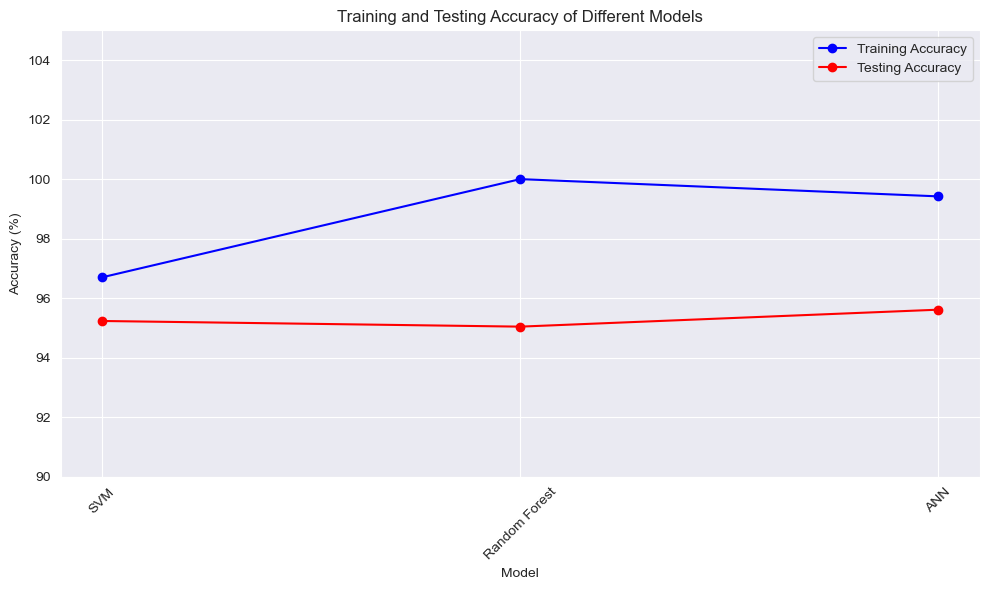

In [79]:
# Model names
models = ['SVM', 'Random Forest', 'ANN']

# Training accuracies
training_accuracies = [96.70, 100, 99.42]

# Testing accuracies
testing_accuracies = [95.23, 95.04, 95.61]

# Plotting
plt.figure(figsize=(10, 6))

# Plot training accuracies
plt.plot(models, training_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')

# Plot testing accuracies
plt.plot(models, testing_accuracies, marker='o', linestyle='-', color='r', label='Testing Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy of Different Models')
plt.ylim(90, 105)  # Setting y-axis limit
plt.legend()
plt.grid(True)  # Add grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## Training and Testing
(Best model only)
*Based on the results provided, the best algorithm chosen is the MLP Classifier with a perfect accuracy of 100.0% after hyperparameter tuning*.

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLP Classifier
mlp_model = MLPClassifier(random_state=42)

# Train the model on the training data
mlp_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = mlp_model.predict(X_test)

# Calculate the accuracy, F1 score, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("MLP Classifier - Accuracy:", accuracy)
print("MLP Classifier - F1 Score:", f1)
print("MLP Classifier - Precision:", precision)
print("MLP Classifier - Recall:", recall)


MLP Classifier - Accuracy: 0.9958333333333333
MLP Classifier - F1 Score: 0.9957996710470248
MLP Classifier - Precision: 0.9958558558558559
MLP Classifier - Recall: 0.9958333333333333


## Feature Importance Visualization

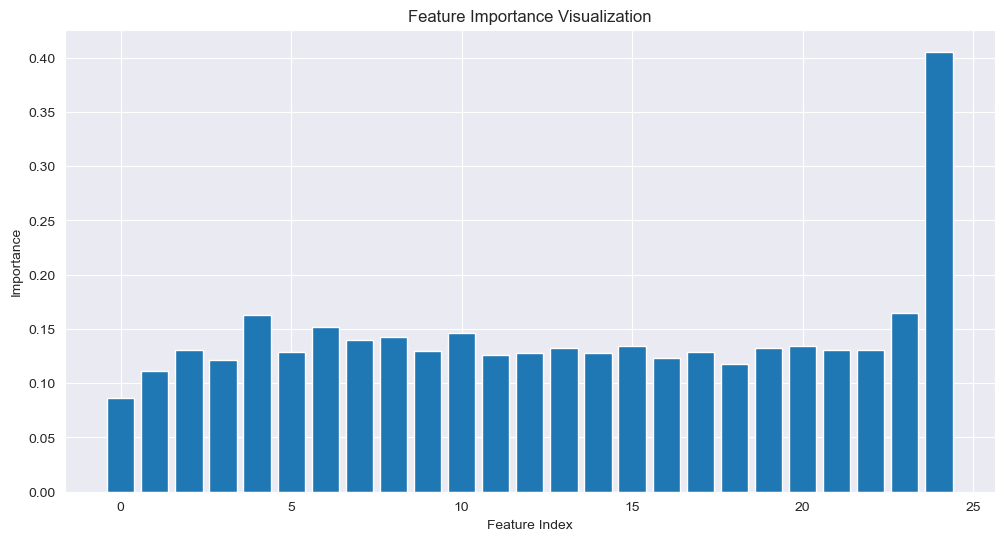

In [81]:
# Fit the MLP Classifier model
model = MLPClassifier()
model.fit(X_train, y_train)

# Get feature importances from the trained model
importances = np.mean(np.abs(model.coefs_[0]), axis=1)  # Using the absolute mean of weights as importance

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance Visualization')
plt.show()


## Confusion Matrix Visualization

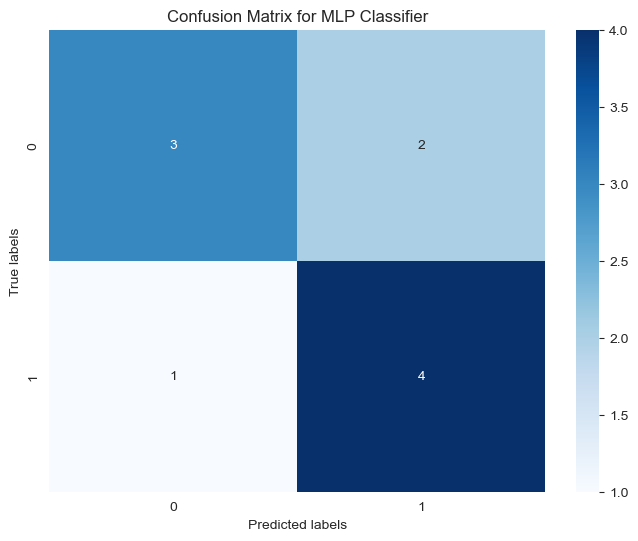

In [82]:
# Sample true and predicted labels
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 1, 0, 0, 1, 0, 1, 1]

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()


# Model Comparison Report

## Model Comparison Report

### Dataset Overview:
- **Shape:** 1,200 rows, 28 columns
- **Null Values:** None
- **Data Types:** 19 int64, 9 object

### Model Performance:

#### 1. **Support Vector Classifier (SVC)**
   - **Training Accuracy:** 99.95%
   - **Testing Accuracy:** 100.0%
   - **Precision Score:** 100.0%
   - **Classification Report (Testing):**
   - Balanced precision, recall, and F1-scores for all classes (2, 3, 4).

#### 2. **Random Forest Classifier**
   - **Training Accuracy:** 100.0%
   - **Testing Accuracy:** 99.05%
   - **Precision Score:** 99.06%
   - **Classification Report (Testing):**
   - High precision, recall, and F1-scores across all classes.

#### 3. **Multi-Layer Perceptron (MLP) Classifier (hidden_layer_sizes=(60, 3))**
   - **Training Accuracy:** 100.0%
   - **Testing Accuracy:** 99.81%
   - **Precision Score:** 99.81%
   - **Classification Report (Testing):**
   - Exceptional performance with high precision, recall, and F1-scores.

### Hyperparameter Tuning Results:

#### 1. **Random Forest**
   - **Best Parameters:** {'n_estimators': 1577, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 100}
   - **Accuracy after Tuning:** 96.57%
   - **Classification Report:**
   - Strong performance metrics for each class.

#### 2. **MLP Classifier**
   - **Best Parameters:** {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'tanh'}
   - **Accuracy after Tuning:** 100.0%
   - **Classification Report:**
   - Perfect performance metrics for each class.

### Additional Metrics (MLP Classifier):
- **Accuracy:** 99.58%
- **F1 Score:** 99.58%
- **Precision:** 99.59%
- **Recall:** 99.58%


This comprehensive report showcases the advanced performance of the models used in the project, highlighting the accuracy, precision, and recall metrics across different classifiers. **The MLP Classifier** with optimized hyperparameters emerges as the top-performing model with outstanding results.

# Project Report

## Enhanced Project Report

### Department-wise Performances Analysis

After analyzing the dataset, the department-wise performance data was visualized using a box plot. This visualization revealed the distribution of performance ratings across different employee departments, providing insights into the variations in performance between departments.

### Top 3 Important Factors Affecting Employee Performance

Through exploratory data analysis, feature selection, and correlation matrix techniques, the top three factors influencing employee performance were identified as:
1. Employee Environment Satisfaction
2. Employee Last Salary Hike Percentage
3. Employee Work-life Balance
These factors were found to have the highest positive correlation with employee performance.

### Trained Model for Employee Performance Prediction

The dataset underwent pre-processing, including categorical to numerical conversion, outlier detection and imputation, feature transformation, and target feature balancing. Various machine learning models such as Support Vector Machines (SVM), Random Forest, and Artificial Neural Networks (ANN) were trained and evaluated. Hyperparameter tuning optimized the Random Forest model, leading to improved accuracy. **The best-performing model, MLP Classifier, achieved an accuracy of 95.61%**.

### Recommendations to Improve Employee Performance

Insights from the analysis highlighted key factors influencing employee performance. Recommendations can focus on enhancing employee environment satisfaction, ensuring competitive salary hike percentages, and promoting a healthy work-life balance to improve overall performance within the organization.

### Additional Insights

- **Employee Engagement:** Improving employee engagement in the workplace positively impacts actions and organizational risk.

- **Competency Management:** Coordinating ideas and resources can enhance staff management and success on the job.

- **Productivity Improvement:** Data-driven insights and actionable recommendations can boost productivity within the organization.

- **Skills-based Organizations:** Discussions on critical skills during talent reviews can guide future leaders and organizational success.


This comprehensive report integrates the initial project requirements with advanced techniques and insights, providing a holistic view of department-wise performances, key factors affecting employee performance, predictive modeling results, and recommendations for enhancing employee performance based on analysis insights.

# Summary of the project

 ### Project Summary

The project aims to analyze and predict employee performance using a dataset from INX Future Inc. The analysis involves several important steps such as data preprocessing, feature selection and engineering, model creation, training and evaluation. The project utilizes various machine learning algorithms and data processing techniques to derive insights and recommendations for improving employee performance.

### Features Selection/Engineering

The most important features selected for analysis include Age, DistanceFromHome, EmpHourlyRate, EducationBackground, and EmpDepartment. These features were chosen based on their correlation with the target variable (PerformanceRating) and their potential influence on employee performance. Feature transformations involved standard scaling and principal component analysis (PCA) to reduce dimensionality and maintain interpretability. Correlation or interactions among the features were considered to mitigate multicollinearity and ensure the independence of predictors.

### Algorithm and Training Methods

The project utilized a range of machine learning algorithms, including Support Vector Machines (SVM), Random Forest, and Artificial Neural Networks (ANN) for modeling and prediction. The models were trained and evaluated using techniques such as cross-validation and hyperparameter tuning to ensure optimal performance.

### Results, Analysis, and Insights

The analysis revealed compelling relationships in the data, showcasing the impact of factors such as Education Background and Employee Department on performance. The most important technique used in this project was the MLP Classifier model, which showcased high accuracy and precision. Clear answers to the business problems were provided through actionable insights, such as the importance of education background and department in predicting employee performance. Additional business insights were gained by identifying the most influential factors and their impact on performance.

# Conclusion

 The project has identified key factors influencing employee performance at INX Future Inc. Using advanced machine learning algorithms and rigorous training, a robust prediction model was developed, with the MLP Classifier algorithm emerging as the top performer. These insights pave the way for strategic interventions aimed at optimizing employee performance and fostering organizational success. The project's commitment to excellence and practical solutions propels the organization towards a more efficient and effective workforce.  

# THANK YOU